## Loading and Preprocessing data: 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),
                                                                           (0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,transform=transform,
                                              download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False, transform=transform,
                                              download = True)
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import pandas as pd 


/kaggle/input/cifar10-image-recognition/train.npy
/kaggle/input/cifar10-image-recognition/trainLabels.csv
/kaggle/input/cifar10-image-recognition/sampleSubmission.csv
/kaggle/input/cifar10-image-recognition/test.npy
/kaggle/input/cifar10/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10/cifar-10-batches-py/test_batch
/kaggle/input/cifar10/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10/cifar-10-batches-py/readme.html
/kaggle/input/cifar10/cifar-10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10/cifar-10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10/cifar-10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10/cifar-10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10/cifar-10-python/cifar-10-batches-py/data_ba

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# loading dateset
(x_train, y_train),(x_test,y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 5s 0us/step


In [4]:
# Checking loaded data 
print('Total number of Images in the Dataset:', len(x_train) + len(x_test))
print('Number of train images:', len(x_train))
print('Number of test images:', len(x_test))
print('Shape of training dataset:',x_train.shape)
print('Shape of testing dataset:',x_test.shape)
      

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


In [5]:
# This piece of code shows a random images and labels for given set of inputs 

def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)
    
    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)
        
    return
    

In [6]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

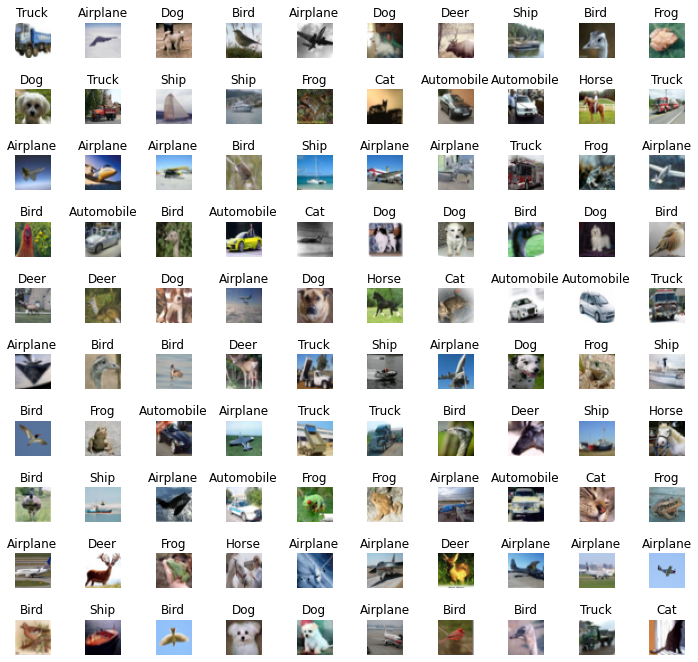

In [7]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [10]:
#Building model computational graph
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (32,32,3),name='Conv_1'))
model.add(BatchNormalization(name='Batch_Norm_1'))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same',name='Conv_2'))
model.add(BatchNormalization(name='Batch_Norm_2'))
model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2),name='Max_Pool_1'))
model.add(Dropout(0.25, name='Dropout_1'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same',name='Conv_3'))
model.add(BatchNormalization(name='Batch_Norm_3'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same',name='Conv_4'))
model.add(BatchNormalization(name='Batch_Norm_4'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2),name='Max_Pool_2'))
model.add(Dropout(0.25, name='Dropout_2'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same',name='Conv_5'))
model.add(BatchNormalization(name='Batch_Norm_5'))
model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same',name='Conv_6'))
model.add(BatchNormalization(name='Batch_Norm_6'))
model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2),name='Max_Pool_3'))
model.add(Dropout(0.25, name='Dropout_3'))
model.add(Flatten(name='Flatten_Layer'))
model.add(Dense(128, activation = 'relu',name='Fully_Connected_Layer'))
model.add(Dropout(0.25,name='Dropout_4'))
model.add(Dense(10, activation = 'softmax',name='Output_Layer'))


In [11]:
#Description about parameters and layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
Batch_Norm_1 (BatchNormaliza (None, 32, 32, 32)        128       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 32)        9248      
_________________________________________________________________
Batch_Norm_2 (BatchNormaliza (None, 32, 32, 32)        128       
_________________________________________________________________
Max_Pool_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 16, 16, 64)       

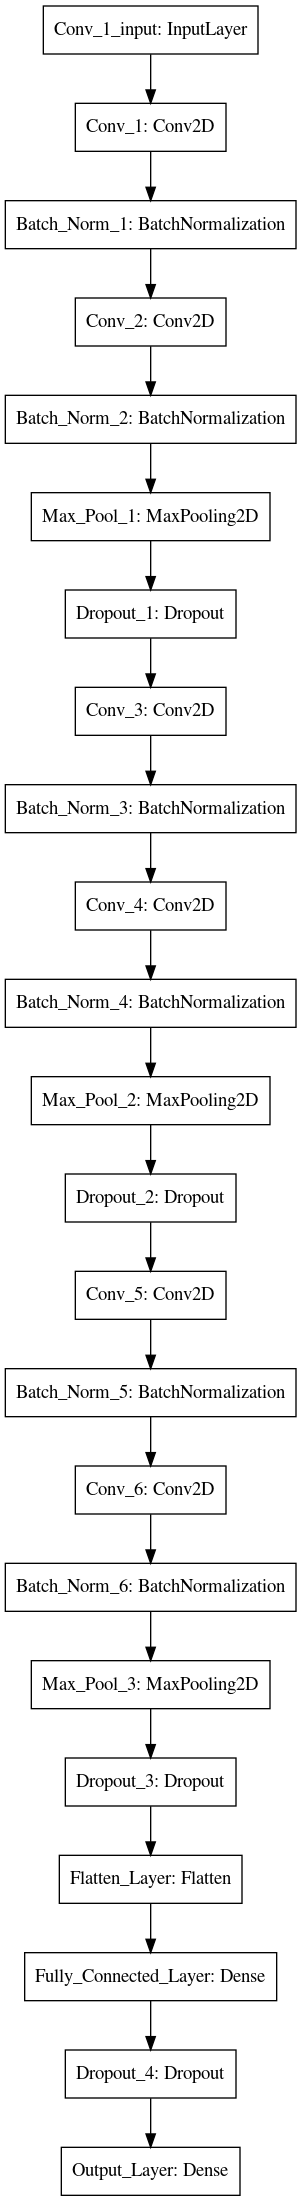

In [12]:
# Flow chart of the model 

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model, to_file='model.png')

     |████████████████████████████████| 989 kB 5.4 MB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


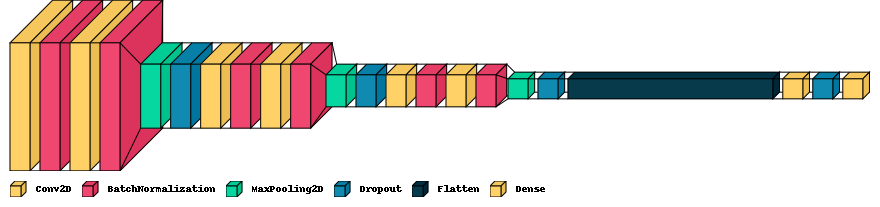

In [13]:
! pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True)

### Training The Model



In [14]:
#compiling model with loss, opt, metrics
loss = 'sparse_categorical_crossentropy'
#learning rates = 0.0001,0.001,0.01,0.1
opt = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9, beta_2=0.999,epsilon=1e-06)
metrics = ['accuracy']

model.compile(loss = loss, optimizer = opt, metrics = metrics)

In [15]:
# fitting the model for training dataset
hist = model.fit(x_train, y_train, batch_size = 64 , epochs = 20, validation_split = 0.2)


Epoch 1/20
625/625 [==============================] - 5s 8ms/step - loss: 2.0208 - accuracy: 0.2873 - val_loss: 1.9764 - val_accuracy: 0.3143
Epoch 2/20
625/625 [==============================] - 4s 7ms/step - loss: 1.6067 - accuracy: 0.4159 - val_loss: 1.4489 - val_accuracy: 0.4890
Epoch 3/20
625/625 [==============================] - 4s 7ms/step - loss: 1.4497 - accuracy: 0.4781 - val_loss: 1.6079 - val_accuracy: 0.4779
Epoch 4/20
625/625 [==============================] - 4s 7ms/step - loss: 1.3296 - accuracy: 0.5245 - val_loss: 1.3893 - val_accuracy: 0.5368
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 1.2322 - accuracy: 0.5595 - val_loss: 1.2144 - val_accuracy: 0.5807
Epoch 6/20
625/625 [==============================] - 4s 7ms/step - loss: 1.1485 - accuracy: 0.5906 - val_loss: 1.2104 - val_accuracy: 0.5926
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 1.0732 - accuracy: 0.6172 - val_loss: 1.0257 - val_accuracy: 0.6420
Epoch 

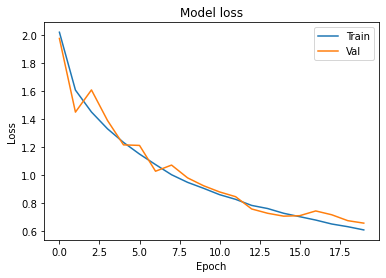

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


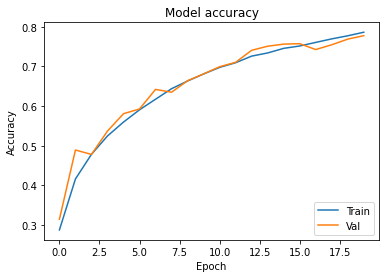

In [17]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')
print()

313/313 - 1s - loss: 0.6709 - accuracy: 0.7750
Test Accuracy: 77.50%
Test Loss: 0.6709



Classification Report:
               precision    recall  f1-score   support

    Airplane       0.79      0.79      0.79      1000
  Automobile       0.91      0.87      0.89      1000
        Bird       0.72      0.62      0.66      1000
         Cat       0.63      0.58      0.61      1000
        Deer       0.70      0.81      0.75      1000
         Dog       0.75      0.61      0.67      1000
        Frog       0.76      0.88      0.81      1000
       Horse       0.87      0.79      0.83      1000
        Ship       0.81      0.91      0.86      1000
       Truck       0.81      0.89      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000




<Figure size 1800x1800 with 0 Axes>

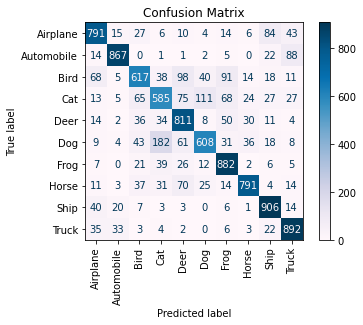

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the testing set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to actual labels
y_true_classes = np.squeeze(y_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=labels)
print('Classification Report:\n', class_report)
print()

# Plot Confusion Matrix
plt.figure(figsize=(25,25))
ConfusionMatrixDisplay(conf_matrix, display_labels=labels).plot(cmap='PuBu',values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation='vertical')
plt.show()

ResNet

In [23]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint

# Load pre-trained ResNet50 model without top classification layer
base_model_res = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Fine-tuning the entire model
for layer in base_model_res.layers:
    layer.trainable = True

# using the pre trained model as a feature extractor
model_res = models.Sequential([
    base_model_res,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_res.compile(loss = loss, optimizer = opt, metrics = metrics)

# Fine-tune the model
checkpoint_res = ModelCheckpoint('cifar10_fine_tuned_resnet.h5', save_best_only=True)
history = model_res.fit(x_train, y_train, batch_size = 64 , epochs = 20, validation_split = 0.2, callbacks=[checkpoint_res])

# Evaluate the model
test_loss_res, test_acc_res =model_res.evaluate(x_test, y_test)

print()
print(f'Test accuracy with ResNet pretrained model: {test_acc_res}')

Epoch 1/20
625/625 [==============================] - 27s 43ms/step - loss: 1.2723 - accuracy: 0.5866 - val_loss: 2.8123 - val_accuracy: 0.1488
Epoch 2/20
625/625 [==============================] - 26s 42ms/step - loss: 0.7178 - accuracy: 0.7577 - val_loss: 0.6775 - val_accuracy: 0.7723
Epoch 3/20
625/625 [==============================] - 26s 42ms/step - loss: 0.5079 - accuracy: 0.8293 - val_loss: 0.6584 - val_accuracy: 0.7870
Epoch 4/20
625/625 [==============================] - 25s 41ms/step - loss: 0.3766 - accuracy: 0.8723 - val_loss: 0.6911 - val_accuracy: 0.7822
Epoch 5/20
625/625 [==============================] - 26s 41ms/step - loss: 0.2765 - accuracy: 0.9054 - val_loss: 0.7172 - val_accuracy: 0.7936
Epoch 6/20
625/625 [==============================] - 25s 41ms/step - loss: 0.1995 - accuracy: 0.9315 - val_loss: 0.7551 - val_accuracy: 0.7956
Epoch 7/20
625/625 [==============================] - 25s 40ms/step - loss: 0.1569 - accuracy: 0.9475 - val_loss: 0.8183 - val_accuracy:

DenseNet

In [24]:
from tensorflow.keras.applications import DenseNet169

# Load pre-trained DenseNet169 model without top classification layer
base_model_dense = DenseNet169(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Fine-tuning the entire model
for layer in base_model_dense.layers:
    layer.trainable = True

# using the pre trained model as a feature extractor
model_dense = models.Sequential([
    base_model_dense,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_dense.compile(loss = loss, optimizer = opt, metrics = metrics)

# Fine-tune the model
checkpoint_dense = ModelCheckpoint('cifar10_fine_tuned_dense.h5', save_best_only=True)
history_dense = model_dense.fit(x_train, y_train, batch_size = 64 , epochs = 20, validation_split = 0.2, callbacks=[checkpoint_dense])

# Evaluate the model
test_loss_dense, test_acc_dense =model_dense.evaluate(x_test, y_test)

print()
print(f'Test accuracy with DenseNet pretrained model: {test_acc_dense}')

51879936/51877672 [==============================] - 0s 0us/step
Epoch 1/20
625/625 [==============================] - 42s 67ms/step - loss: 1.0760 - accuracy: 0.6449 - val_loss: 0.6812 - val_accuracy: 0.7652
Epoch 2/20
625/625 [==============================] - 39s 62ms/step - loss: 0.5769 - accuracy: 0.8087 - val_loss: 0.5251 - val_accuracy: 0.8164
Epoch 3/20
625/625 [==============================] - 37s 59ms/step - loss: 0.4139 - accuracy: 0.8622 - val_loss: 0.5494 - val_accuracy: 0.8152
Epoch 4/20
625/625 [==============================] - 37s 59ms/step - loss: 0.2822 - accuracy: 0.9085 - val_loss: 0.5285 - val_accuracy: 0.8310
Epoch 5/20
625/625 [==============================] - 37s 58ms/step - loss: 0.2006 - accuracy: 0.9338 - val_loss: 0.6736 - val_accuracy: 0.8238
Epoch 6/20
625/625 [==============================] - 36s 58ms/step - loss: 0.1389 - accuracy: 0.9546 - val_loss: 0.5950 - val_accuracy: 0.8385
Epoch 7/20
625/625 [==============================] - 36s 58ms/step - l